In [1]:
print('blah blah blah')

blah blah blah


In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\LiTe\AppData\Local\Programs\Python\Python312\Lib\site-packages\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\LiTe\AppData\Local\Programs\Python\Python312\Lib\site-packages\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\LiTe\AppData\Local\Programs\Python\Python312\Lib\site-packages\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\LiTe\AppData\Loca

In [1]:
import numpy as np

# Example output probabilities from your model
yhat = np.array([0.1, 0.3, 0.2, 0.4])  # Replace this with your actual model output

# Define class names in the order corresponding to the indices in the output
class_names = ['ECZEMA', 'VITILIGO', 'ACNE', 'CHICKEN POX']

# Initialize variables to track the highest probability and the predicted class index
highest_probability = 0.0
predicted_class_index = -1

# Manually compare each probability using if statements
if yhat[0] > highest_probability:
    highest_probability = yhat[0]
    predicted_class_index = 0

if yhat[1] > highest_probability:
    highest_probability = yhat[1]
    predicted_class_index = 1

if yhat[2] > highest_probability:
    highest_probability = yhat[2]
    predicted_class_index = 2

if yhat[3] > highest_probability:
    highest_probability = yhat[3]
    predicted_class_index = 3

# Get the corresponding class name using the index
predicted_class_name = class_names[predicted_class_index]

# Print the results
print(f'Predicted class is {predicted_class_name} with probability {highest_probability:.2f}')


Predicted class is CHICKEN POX with probability 0.40


In [ ]:
libglib2 windows msvc-x86_64.dll

 1. Install Dependencies and Setup

In [12]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\LiTe\AppData\Local\Programs\Python\Python312\Lib\site-packages\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\LiTe\AppData\Local\Programs\Python\Python312\Lib\site-packages\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\LiTe\AppData\Local\Programs\Python\Python312\Lib\site-packages\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\LiTe\AppData\Loca

In [13]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
altair                    5.2.0
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asgiref                   3.7.2
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.7.0
cachetools                5.3.3
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
Django                    5.0.3
executing          

In [14]:
import tensorflow as tf
import os

In [15]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [16]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [17]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [18]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [20]:
import cv2
import imghdr

In [21]:
data_dir = 'data' 

In [22]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [23]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [24]:
for image_class in os.listdir(data_dir):
    image_class_path = os.path.join(data_dir, image_class)

    # Check if the current item is a directory
    if os.path.isdir(image_class_path):
        for image in os.listdir(image_class_path):
            image_path = os.path.join(image_class_path, image)
            try: 
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts: 
                    print(f'Image not in ext list: {image_path}')
                    os.remove(image_path)
            except Exception as e: 
                print(f'Issue with image: {image_path} - {e}')
                # Uncomment the next line if you want to remove problematic files
                # os.remove(image_path)

# 3. Load Data

In [25]:
import numpy as np
from matplotlib import pyplot as plt

In [26]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 643 files belonging to 4 classes.


In [27]:
data_iterator = data.as_numpy_iterator()

In [36]:
batch = data_iterator.next()

In [37]:
# Class 1 = vitiligo
# Class 0 = ECZEMA
# Class 2 = ACNE
# Class 3 = CHICKEN POX

batch[1]


array([0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 0, 3, 2, 0, 0, 3, 1, 0, 3, 3, 1, 3,
       0, 0, 1, 3, 2, 2, 3, 1, 1, 3])

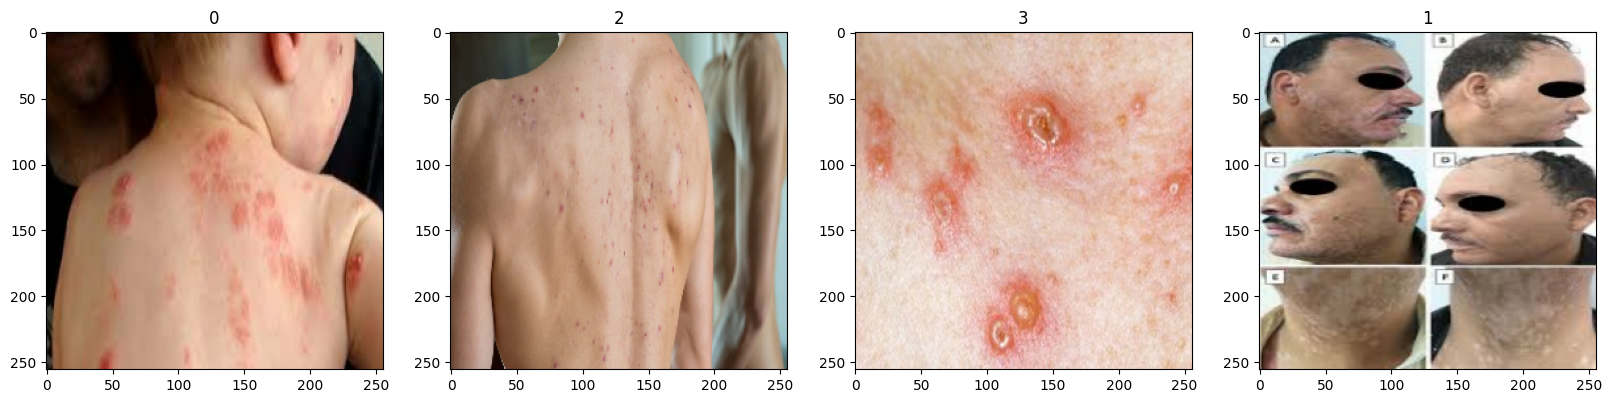

In [38]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Index 0
Index 1
Index 2
Index 3
Index 4


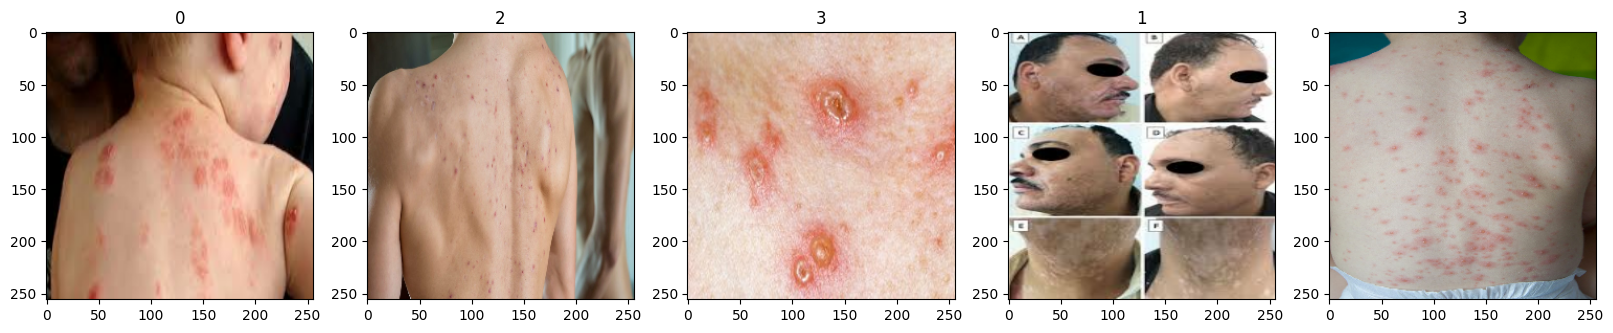

In [39]:
import matplotlib.pyplot as plt

# Assuming batch[0] contains your images and batch[1] contains titles

num_cols = 5
fig, ax = plt.subplots(ncols=num_cols, figsize=(20, 20))

# Loop over the number of subplots and batch images
for idx in range(num_cols):
    if idx < len(batch[0]):  # Ensure we do not go out of bounds
        img = batch[0][idx]
        ax[idx].imshow(img.astype(int))
        ax[idx].title.set_text(batch[1][idx])
    print(f"Index {idx}")

# Hide any unused subplots
for j in range(len(batch[0]), num_cols):
    ax[j].axis('off')

plt.show()


# 4. Scale Data

In [40]:
data = data.map(lambda x,y: (x/255, y))

In [41]:
data.as_numpy_iterator().next()

(array([[[[0.40392157, 0.39215687, 0.37254903],
          [0.40784314, 0.39607844, 0.3764706 ],
          [0.4117647 , 0.4       , 0.38039216],
          ...,
          [0.24705882, 0.24705882, 0.2430913 ],
          [0.24705882, 0.24705882, 0.23921569],
          [0.24705882, 0.24705882, 0.23921569]],
 
         [[0.40392157, 0.39215687, 0.37254903],
          [0.40784314, 0.39607844, 0.3764706 ],
          [0.41181067, 0.40004596, 0.38043812],
          ...,
          [0.24705882, 0.24705882, 0.2430913 ],
          [0.24705882, 0.24705882, 0.23921569],
          [0.24705882, 0.24705882, 0.23921569]],
 
         [[0.40228817, 0.39052346, 0.37091562],
          [0.42470714, 0.41294244, 0.3933346 ],
          [0.4205729 , 0.4088082 , 0.38920036],
          ...,
          [0.23922762, 0.23922762, 0.2352601 ],
          [0.24023438, 0.24023438, 0.23239124],
          [0.24023438, 0.24023438, 0.23239124]],
 
         ...,
 
         [[0.65795803, 0.6893306 , 0.7010953 ],
          [0.66524

# 5. Split Data

In [42]:
len(data)

21

In [43]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [44]:
train_size

14

In [45]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [46]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [48]:
model = Sequential()

In [49]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Example input data with shape (batch_size, height, width, channels)
# Replace this with your actual data
input_data = np.random.rand(32, 256, 256, 3)  # Example: batch size of 32, 256x256 image with 3 channels (RGB)

# Define the model
model = Sequential()

# Add layers to the model
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))

# Continue with more layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Output layer for a 4-class classification problem
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check the model summary
model.summary()

# Fit the model to the data (example)
model.fit(input_data, np.random.rand(32, 4), epochs=10)  # Replace with your actual labels and data


C:\Users\LiTe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 500000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      64,000,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,005,732 (244.16 MB)

 Trainable params: 64,005,732 (244.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2812 - loss: 2.8526
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step - accuracy: 0.3438 - loss: 60.2840
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step - accuracy: 0.3438 - loss: 169.5722
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step - accuracy: 0.1875 - loss: 313.5020
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step - accuracy: 0.1875 - loss: 186.6240
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step - accuracy: 0.3438 - loss: 228.6897
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step - accuracy: 0.3438 - loss: 158.3390
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step - accuracy: 0.3438 - loss: 388.4986
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step - accuracy: 0.3438 - loss: 471.2248
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step - accuracy: 0.1250 - loss: 565.7283


In [81]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

ValueError: Input 0 of layer "conv2d_14" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 1)

In [50]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='softmax')
])


In [51]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      15,745,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,750,369 (60.08 MB)

 Trainable params: 15,750,369 (60.08 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = 4  # Adjust this to the number of classes you have

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Number of units should match number of classes
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,397,028 (28.22 MB)

 Trainable params: 7,397,028 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
logdir='logs'

In [55]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [56]:
import tensorflow as tf

# Define the number of classes
num_classes = 4

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Multi-class output
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',  # Use categorical_crossentropy for one-hot labels
              metrics=['accuracy'])

# Define the TensorBoard callback
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Preprocess the dataset
def preprocess_dataset(dataset):
    def preprocess(image, label):
        label = tf.one_hot(label, depth=num_classes)  # One-hot encode labels
        return image, label
    
    dataset = dataset.map(preprocess)
    return dataset

train = preprocess_dataset(train)
val = preprocess_dataset(val)

# Train the model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 341ms/step - accuracy: 0.2947 - loss: 2.0984 - val_accuracy: 0.3203 - val_loss: 1.3024
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 363ms/step - accuracy: 0.4059 - loss: 1.2703 - val_accuracy: 0.5469 - val_loss: 1.0871
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 320ms/step - accuracy: 0.6024 - loss: 1.0309 - val_accuracy: 0.6406 - val_loss: 0.9898
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 379ms/step - accuracy: 0.6917 - loss: 0.8442 - val_accuracy: 0.7344 - val_loss: 0.6634
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 357ms/step - accuracy: 0.7728 - loss: 0.6399 - val_accuracy: 0.8594 - val_loss: 0.5707
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 350ms/step - accuracy: 0.8634 - loss: 0.4539 - val_accuracy: 0.8203 - val_loss: 0.4529
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 336ms/step - accuracy: 0.9159 - loss: 0.2815 - val_accuracy: 0.9219 - val_loss: 0.2755
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 348ms/step - accuracy: 0.9416 - loss: 0.1788 - val_accuracy: 0.

# 8. Plot Performance

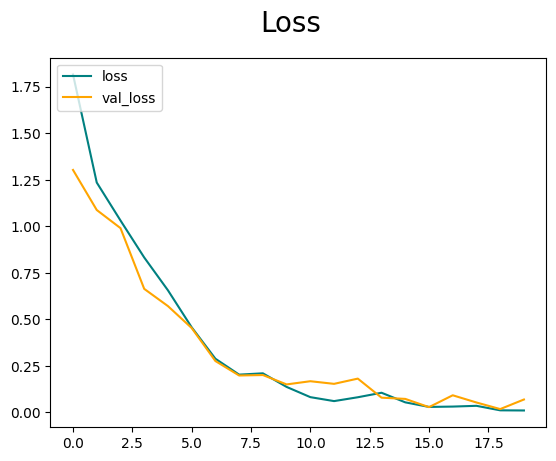

In [59]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

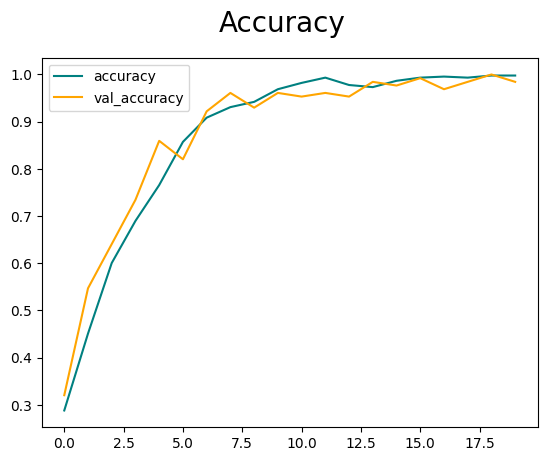

In [63]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [64]:
hist.history


{'accuracy': [0.2879464328289032,
  0.4508928656578064,
  0.6004464030265808,
  0.6897321343421936,
  0.765625,
  0.8571428656578064,
  0.9084821343421936,
  0.9308035969734192,
  0.9419642686843872,
  0.96875,
  0.9821428656578064,
  0.9933035969734192,
  0.9776785969734192,
  0.9732142686843872,
  0.9866071343421936,
  0.9933035969734192,
  0.9955357313156128,
  0.9933035969734192,
  0.9977678656578064,
  0.9977678656578064],
 'loss': [1.815326452255249,
  1.234658122062683,
  1.0308250188827515,
  0.8319973349571228,
  0.6555284857749939,
  0.45679110288619995,
  0.2878911793231964,
  0.20249895751476288,
  0.20952394604682922,
  0.13645921647548676,
  0.08150436729192734,
  0.06023150682449341,
  0.08090942353010178,
  0.10509289056062698,
  0.05356628820300102,
  0.028898051008582115,
  0.030804742127656937,
  0.034922439604997635,
  0.010663026943802834,
  0.009867344982922077],
 'val_accuracy': [0.3203125,
  0.546875,
  0.640625,
  0.734375,
  0.859375,
  0.8203125,
  0.921875,


# 9. Evaluate

In [65]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [66]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [67]:
num_samples = sum(len(batch[0]) for batch in test)
print(f'Number of samples in test dataset: {num_samples}')


Number of samples in test dataset: 64


In [69]:

from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

# Initialize metrics
precision = Precision()
recall = Recall()
accuracy = SparseCategoricalAccuracy()

# Evaluate the model
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    # Ensure y and yhat are compatible with SparseCategoricalAccuracy
    precision.update_state(tf.argmax(y, axis=-1), tf.argmax(yhat, axis=-1))
    recall.update_state(tf.argmax(y, axis=-1), tf.argmax(yhat, axis=-1))
    accuracy.update_state(tf.argmax(y, axis=-1), tf.argmax(yhat, axis=-1))
     

# Print results
print("Precision:", precision.result().numpy())
print("Recall:", recall.result().numpy())
print("Accuracy:", accuracy.result().numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Precision: 1.0
Recall: 0.703125
Accuracy: 1.0


In [70]:
#for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

IndentationError: unexpected indent (2601342609.py, line 2)

In [71]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [72]:
import cv2 

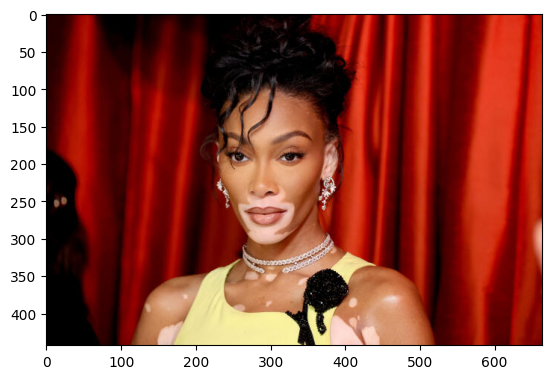

In [73]:
img = cv2.imread('testvitiligo.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

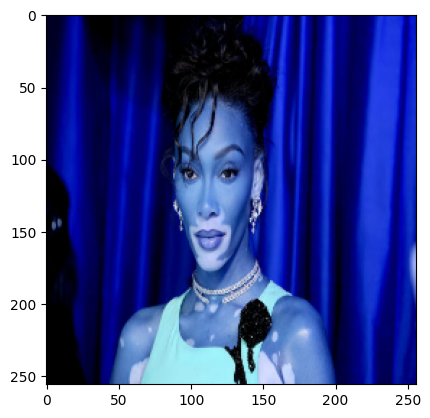

In [74]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [79]:
input_image = np.expand_dims(resize, axis=0)


In [80]:
yhat = model.predict(np.expand_dims(resize/255, 0)

SyntaxError: incomplete input (1290803984.py, line 1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))